# Import Library dan Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from google.colab import files

In [2]:
uploaded = files.upload()                     #Upload file
filename = list(uploaded.keys())[0]           #Membaca nama file
df = pd.read_csv(filename)                    #Membaca file CSV

Saving application_train.csv to application_train (2).csv


EDA (Exploratory Data Analysis)

In [3]:
print("Nama File\t:", filename)
print("Nama kolom\t:", df.columns.tolist())   #Menampilkan attribute/judul kolom
print("Banyak data\t:", df.shape)             #Menampilkan ukuran data (baris, kolom)

Nama File	: application_train (2).csv
Nama kolom	: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATAT

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
print('Data types: \n')
df.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    in

In [8]:
df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


In [9]:
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


## Check Distribusi TARGET

In [10]:
def data_split(df, start, end, date_col):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[date_col] >= start) & (df[date_col] < end)]
    #data = df[(df.order_date >= start) & (df.order_date < end)]
    data = data.reset_index(drop=True)
    #data = data.sort_values(["date", "tic"], ignore_index=True)
    #data.index = data.date.factorize()[0]
    return data


def target_info(df_target_column):
    '''
    Print target column information -- count for each unique values in target column
    Input: target column in dataframe
    '''
    proportion_true=str(round(sum(df_target_column == True) / len(df_target_column), 2) * 100)

    proportion_false=str(round(sum(df_target_column == False) / len(df_target_column), 3) * 100)

    print('There are total {} records in our data.'.format(len(df_target_column)))
    print('Is Fraud:')
    print('Count: {}'.format(sum(df_target_column == True)))
    print('Proportion (Fraud): {}'.format(proportion_true
                                  + '%'))
    print('Not Fraud:')
    print('Count: {}'.format(sum(df_target_column == False)))
    print('Proportion (Not Fraud): {}'.format(proportion_false
                                  + '%'))
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df_target_column.value_counts().index, y=df_target_column.value_counts())
    plt.title('Not Fraud vs Fraud Counts')
    plt.ylabel('Count')
    return proportion_true

There are total 307511 records in our data.
Is Fraud:
Count: 24825
Proportion (Fraud): 8.0%
Not Fraud:
Count: 282686
Proportion (Not Fraud): 91.9%


'8.0'

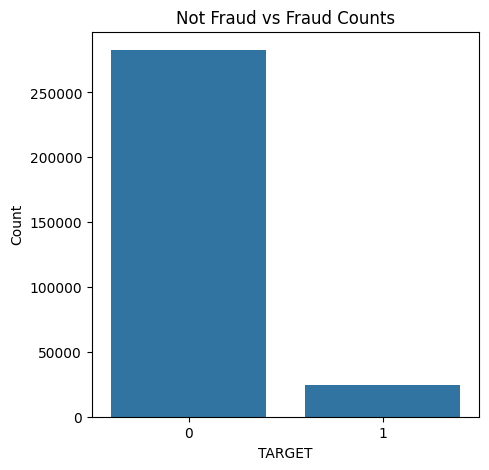

In [11]:
target_info(df['TARGET'])

## Insight Data

Jumlah nasabah yang mengajukan pinjaman

In [12]:
customers = df.groupby('TARGET')['CODE_GENDER'].count().reset_index()
customers.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

customers['Customers_pct'] = round(customers.Customers / customers.Customers.sum(), 2)
customers

,TARGET,Customers,Customers_pct
0,0,282686,0.92
1,1,24825,0.08


Status Pernikahan (Marital Status)

In [13]:
NAME_FAMILY_STATUS_count = df.NAME_FAMILY_STATUS.value_counts()
NAME_FAMILY_STATUS_count

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


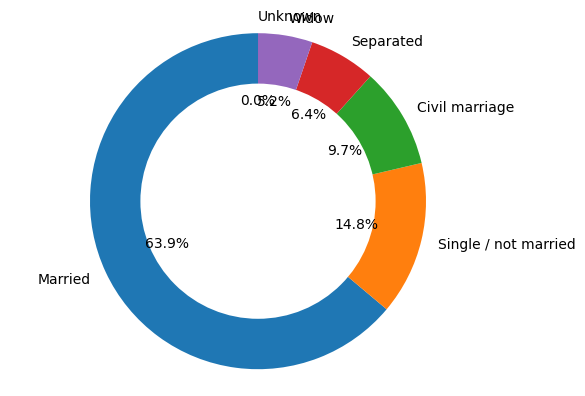

In [14]:
# Create a pie chart
plt.pie(NAME_FAMILY_STATUS_count, labels=NAME_FAMILY_STATUS_count.index, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

In [15]:
Marital_status = []
married = ['Married', 'Civil marriage']

for i in df.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

df['Marital_status'] = Marital_status
df.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

In [16]:
NAME_FAMILY_STATUS_new = df[df['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
NAME_FAMILY_STATUS_new

,Marital_status,CODE_GENDER
0,Married,208396
1,Unmarried,74290


In [17]:
NAME_FAMILY_STATUS_new = df[df['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
NAME_FAMILY_STATUS_new.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

NAME_FAMILY_STATUS_new['Customers_pct'] = round(customers.Customers / customers.Customers.sum(), 2)
NAME_FAMILY_STATUS_new

,Marital_status,Customers Count,Customers_pct
0,Married,208396,0.92
1,Unmarried,74290,0.08


In [18]:
status_menikah = df.groupby(['Marital_status', 'TARGET'])['CODE_GENDER'].count().reset_index()
status_menikah .rename(columns={'CODE_GENDER': 'Customers'}, inplace=True)

status_menikah ['Customers_pct'] = round(status_menikah.Customers / status_menikah.Customers.sum(), 2)
mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

status_menikah['TARGET'] = status_menikah['TARGET'].map(mapping_target)
status_menikah

,Marital_status,TARGET,Customers,Customers_pct
0,Married,Tidak Terkendala,208396,0.68
1,Married,Terkendala,17811,0.06
2,Unmarried,Tidak Terkendala,74290,0.24
3,Unmarried,Terkendala,7014,0.02


Usia

In [19]:
df['Age'] =  np.floor(df['DAYS_BIRTH'] / -365).astype(int)
df.drop(columns= 'DAYS_BIRTH', inplace=True)

In [20]:
age_category = []
for i in df['Age']:
    if i < 36:
        age_category.append('Young Adult')
    elif i < 51:
        age_category.append('Adult')
    else:
        age_category.append('Older')

df['Age_Category'] = age_category

In [21]:
category_age = df.groupby(['Age_Category','TARGET'])['CODE_GENDER'].count().reset_index().sort_values('Age_Category').reset_index()
category_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
category_age.drop(columns = 'index', inplace=True)

name_of_ot = list(category_age['Age_Category'].unique())
percentage = []

for i in name_of_ot:
    data = category_age[category_age['Age_Category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

category_age['percentage'] = percentage

mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

category_age['TARGET'] = category_age['TARGET'].map(mapping_target)
category_age

,Age_Category,TARGET,Customers,percentage
0,Adult,Tidak Terkendala,108678,0.92
1,Adult,Terkendala,9403,0.08
2,Older,Tidak Terkendala,91718,0.94
3,Older,Terkendala,5469,0.06
4,Young Adult,Tidak Terkendala,82290,0.89
5,Young Adult,Terkendala,9953,0.11


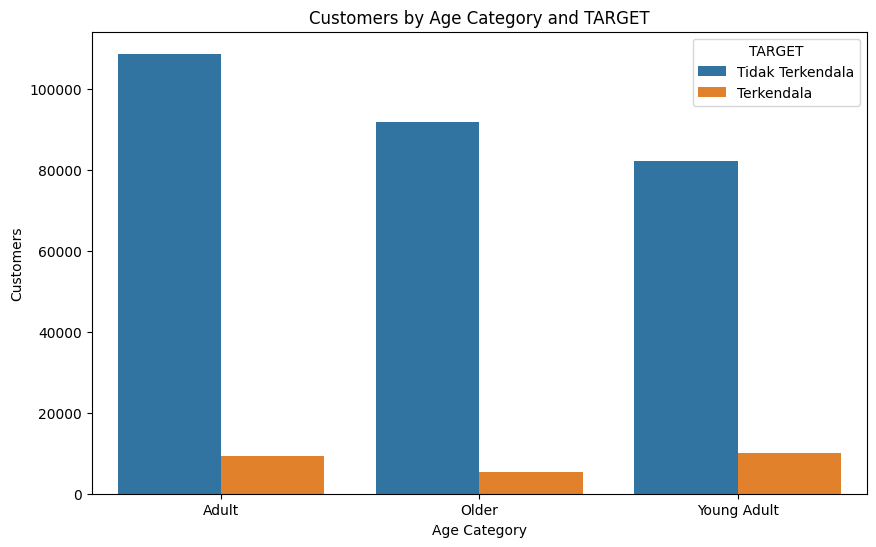

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Customers', hue='TARGET', data=category_age)

plt.xlabel('Age Category')
plt.ylabel('Customers')
plt.title('Customers by Age Category and TARGET')
plt.legend(title='TARGET')
plt.show()

Clients Payment Status

In [23]:
# create new column to replace values using text description
status= {0: 'No Payment Difficulties', 1:'Payment Difficulties'}
df['TARGET_DESC']= df['TARGET'].replace(status)

/tmp/ipython-input-351672245.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis.text(i, count+0.1, f'{percentages[i]:.1f}%', ha='center')


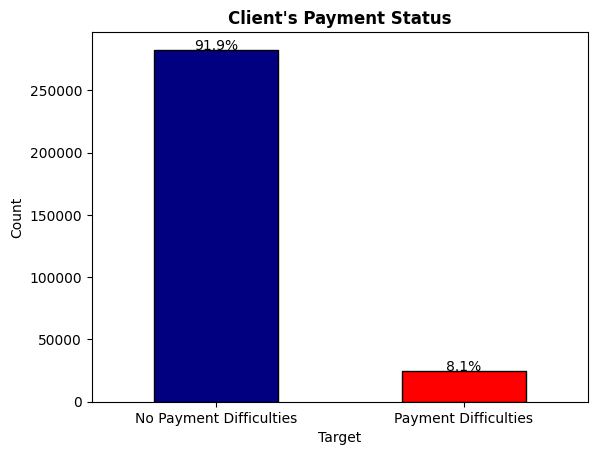

In [24]:
# barchart target
axis= df['TARGET_DESC'].value_counts().plot(kind='bar', color=['navy','red'], edgecolor='black')

# percentages of each category
percentages= df['TARGET_DESC'].value_counts(normalize=True)*100

for i, count in enumerate (df['TARGET_DESC'].value_counts()):
    axis.text(i, count+0.1, f'{percentages[i]:.1f}%', ha='center')

plt.xlabel('Target')
plt.ylabel('Count')
plt.title("Client's Payment Status", weight= 'bold')
plt.xticks(rotation=0)
plt.show()

Income Type

In [25]:
it = df.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
it.sort_values(by='SK_ID_CURR', ascending=False)
it.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,0,10
1,Commercial associate,0,66257
2,Commercial associate,1,5360
3,Maternity leave,0,3
4,Maternity leave,1,2
5,Pensioner,0,52380
6,Pensioner,1,2982
7,State servant,0,20454
8,State servant,1,1249
9,Student,0,18


In [26]:
df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Tipe Kontrak (Name Contract Type)

In [27]:
tipe_kontrak = df.groupby([ 'NAME_CONTRACT_TYPE','TARGET'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
tipe_kontrak.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

nama_tipe_kontrak  = list(tipe_kontrak['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in nama_tipe_kontrak:
    data = tipe_kontrak[tipe_kontrak['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers Count'].sum()
    for x,y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

tipe_kontrak['Percent'] = percentage
tipe_kontrak['Percent All'] = round(tipe_kontrak['Customers Count'] / total, 2)
mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

tipe_kontrak['TARGET'] = tipe_kontrak['TARGET'].map(mapping_target)
tipe_kontrak

,NAME_CONTRACT_TYPE,TARGET,Customers Count,Percent,Percent All
0,Cash loans,Tidak Terkendala,255011,0.92,8.71
1,Cash loans,Terkendala,23221,0.08,0.79
2,Revolving loans,Tidak Terkendala,27675,0.95,0.95
3,Revolving loans,Terkendala,1604,0.05,0.05


Jenis Pekerjaan (Occupation Type)

In [28]:
jenis_kerja = df.groupby([ 'OCCUPATION_TYPE','TARGET'])['CODE_GENDER'].count().reset_index().sort_values(by = 'OCCUPATION_TYPE')
jenis_kerja.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

nama_jenis_kerja  = list(jenis_kerja['OCCUPATION_TYPE'].unique())
percentage = []

for i in nama_jenis_kerja:
    data = jenis_kerja[jenis_kerja['OCCUPATION_TYPE'] == i]
    total = data['Customers Count'].sum()
    for x,y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

jenis_kerja['Percent'] = percentage
jenis_kerja['Percent All'] = round(jenis_kerja['Customers Count'] / total, 2)

mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

jenis_kerja['TARGET'] = jenis_kerja['TARGET'].map(mapping_target)
jenis_kerja.sort_values('Percent', ascending=False).head(10)

,OCCUPATION_TYPE,TARGET,Customers Count,Percent,Percent All
0,Accountants,Tidak Terkendala,9339,0.95,6.93
14,IT staff,Tidak Terkendala,492,0.94,0.36
10,HR staff,Tidak Terkendala,527,0.94,0.39
6,Core staff,Tidak Terkendala,25832,0.94,19.16
20,Managers,Tidak Terkendala,20043,0.94,14.87
12,High skill tech staff,Tidak Terkendala,10679,0.94,7.92
22,Medicine staff,Tidak Terkendala,7965,0.93,5.91
30,Secretaries,Tidak Terkendala,1213,0.93,0.90
24,Private service staff,Tidak Terkendala,2477,0.93,1.84
26,Realty agents,Tidak Terkendala,692,0.92,0.51


# Preprocessing Data

## Mengatasi Data Hilang (Missing Data)

In [29]:
# cek jumlah missing values di setiap column
missing_percentage= (df.isnull().sum()/df.shape[0])*100
missing_percentage

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
Marital_status,0.000000
Age,0.000000
Age_Category,0.000000


In [30]:
# drop column % missing_values > 50%
def drop_columns(df):
    missing_percentage= (df.isnull().sum()/df.shape[0])*100
    col_drop = missing_percentage[missing_percentage > 50].index
    df= df.drop(columns= col_drop)
    return df

df= drop_columns(df)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age,Age_Category,TARGET_DESC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,Unmarried,25,Young Adult,Payment Difficulties
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Married,45,Adult,No Payment Difficulties
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried,52,Older,No Payment Difficulties
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,Married,52,Older,No Payment Difficulties
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried,54,Older,No Payment Difficulties


## Cek Data Pencilan (Outlier)

In [31]:
num = df.select_dtypes(include=['float64', 'int64'])
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})
df_num['Std_value'] = num.std().reset_index(drop=True)
df_num['Max'] = num.max().values
df_num['Min'] = num.min().values
df_num.sort_values('Std_value', ascending=False).head(20)

,Name_of_column,Total_unique,Std_value,Max,Min
4,AMT_CREDIT,5603,402490.776996,4050000.0,45000.0
6,AMT_GOODS_PRICE,1002,369446.460540,4050000.0,40500.0
3,AMT_INCOME_TOTAL,2548,237123.146279,117000000.0,25650.0
8,DAYS_EMPLOYED,12574,141275.766519,365243.0,-17912.0
0,SK_ID_CURR,307511,102790.175348,456255.0,100002.0
5,AMT_ANNUITY,13672,14493.737315,258025.5,1615.5
9,DAYS_REGISTRATION,15688,3522.886321,0.0,-24672.0
10,DAYS_ID_PUBLISH,6168,1509.450419,0.0,-7197.0
40,DAYS_LAST_PHONE_CHANGE,3773,826.808487,0.0,-4292.0
67,Age,50,11.954593,69.0,20.0


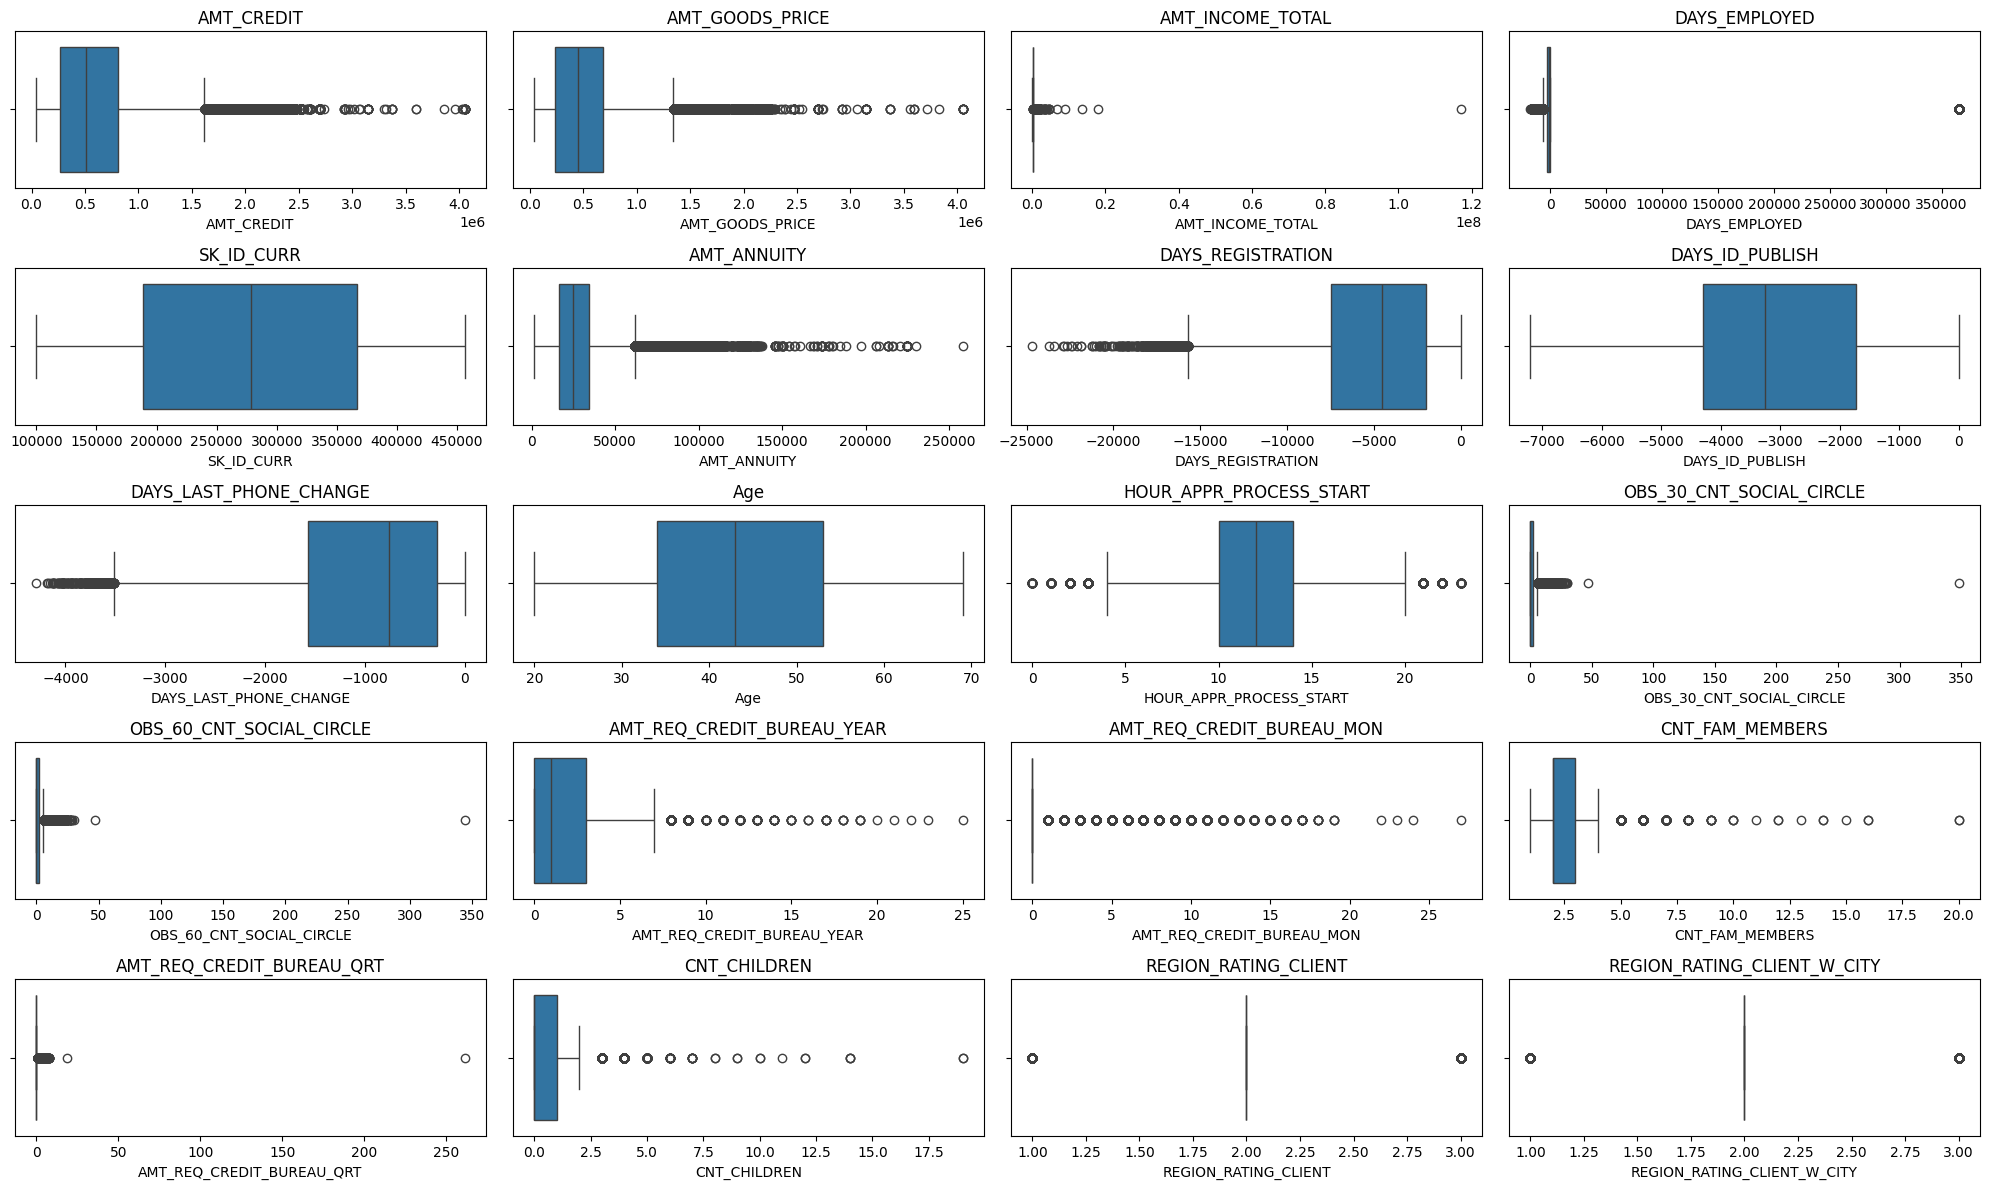

In [32]:
# Sort the DataFrame by the 'Std_value' column in descending order and get the top 20
top_20_features = df_num.sort_values('Std_value', ascending=False).head(20)['Name_of_column'].tolist()

# Create boxplots for the top 20 features
plt.figure(figsize=(20, 12))
for i, column in enumerate(top_20_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=num, x=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

## Mengisi NA dengan Modus (untuk data object)

In [33]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in category_columns):
            df[column]=df[column].fillna(df[column].mode()[0])

In [34]:
df.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,Marital_status,Age_Category,TARGET_DESC
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No,Unmarried,Young Adult,Payment Difficulties
1,Cash loans,F,N,N,Family,State servant,Higher education,House / apartment,Core staff,MONDAY,School,No,Married,Adult,No Payment Difficulties
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,MONDAY,Government,No,Unmarried,Older,No Payment Difficulties
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No,Married,Older,No Payment Difficulties
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,THURSDAY,Religion,No,Unmarried,Older,No Payment Difficulties


## Mengisi NA dengan Median (untuk data integer dan float)

In [35]:
integer_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in integer_columns):
            df[column]=df[column].fillna(df[column].median())

In [36]:
df.select_dtypes(include=['int64','float64']).head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


## One Hot Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

cat_var_new = df.select_dtypes(include = ['object']).columns.tolist()
df[cat_var_new] = df[cat_var_new].apply(LabelEncoder().fit_transform)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age,Age_Category,TARGET_DESC
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1,25,2,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,45,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,52,1,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0,52,1,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1,54,1,0


## Feature Selection

In [38]:
# Convert negative value to positive
application_train1 = df.copy()
application_train1.iloc[:,16:20] = application_train1.iloc[:,16:20].abs()
application_train1.iloc[:,45] = application_train1.iloc[:,45].abs()

In [39]:
# split data
x = application_train1.drop(columns = 'TARGET').abs()
y = application_train1['TARGET'].abs()

In [40]:
# Select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True)

,Features,Score
0,DAYS_EMPLOYED,1.954124e+08
1,AMT_GOODS_PRICE,1.223080e+08
2,AMT_CREDIT,7.669987e+07
3,AMT_INCOME_TOTAL,1.624102e+06
4,DAYS_REGISTRATION,1.348566e+06
...,...,...
77,YEARS_BEGINEXPLUATATION_AVG,1.229669e-02
78,YEARS_BEGINEXPLUATATION_MODE,1.108830e-02
79,AMT_REQ_CREDIT_BUREAU_HOUR,1.832008e-03
80,FLAG_CONT_MOBILE,7.863447e-05


## Keseimbangan Data

### Oversampling

In [41]:
x = application_train1.drop(columns='TARGET')  # DataFrame
y = application_train1['TARGET']               # Series

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_smote, y_smote = sm.fit_resample(x, y.ravel())

/tmp/ipython-input-1453167897.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_smote, y_smote = sm.fit_resample(x, y.ravel())


In [43]:
from sklearn.model_selection import train_test_split
x_trainO2, x_testO2, y_trainO2, y_testO2 = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

### Undersampling

In [44]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x, y.ravel())

/tmp/ipython-input-3835020330.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_under, y_under = rus.fit_resample(x, y.ravel())


In [45]:
x_trainU2, x_testU2, y_trainU2, y_testU2 = train_test_split(x_under, y_under, test_size=0.2, random_state=42)

# Modeling

## Logistic Regression [Oversampling 80%:20%]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.58      0.59      0.58     56536
           1       0.58      0.56      0.57     56539

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.58    113075
weighted avg       0.58      0.58      0.58    113075



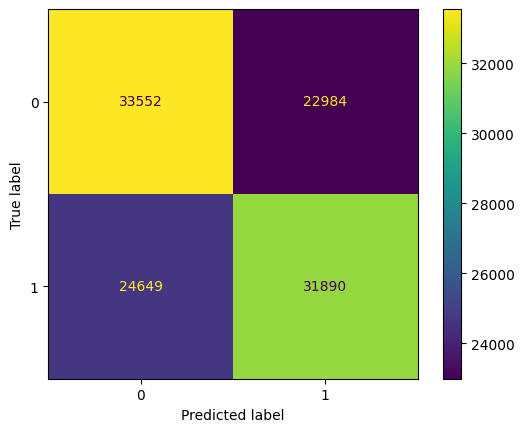

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Definisi fungsi confusionmatrix duluan
def confusionmatrix(predictions, y_testO2):
    cm = confusion_matrix(y_testO2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training
lr = LogisticRegression()
lr.fit(x_trainO2, y_trainO2.ravel())
predictions = lr.predict(x_testO2)

# Print classification report
print(classification_report(y_testO2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testO2)
plt.show()

In [51]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

np.float64(0.578749008540278)

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testO2, predictions)

np.float64(0.578749008540278)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59    226150
           1       0.58      0.56      0.57    226147

    accuracy                           0.58    452297
   macro avg       0.58      0.58      0.58    452297
weighted avg       0.58      0.58      0.58    452297



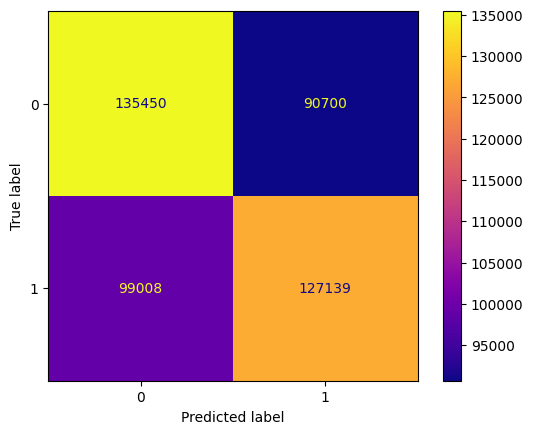

In [53]:
predictions = lr.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

## Logistic Regression [Undersampling 80%:20%]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.57      0.59      0.58      4953
           1       0.58      0.56      0.57      4977

    accuracy                           0.57      9930
   macro avg       0.57      0.57      0.57      9930
weighted avg       0.57      0.57      0.57      9930



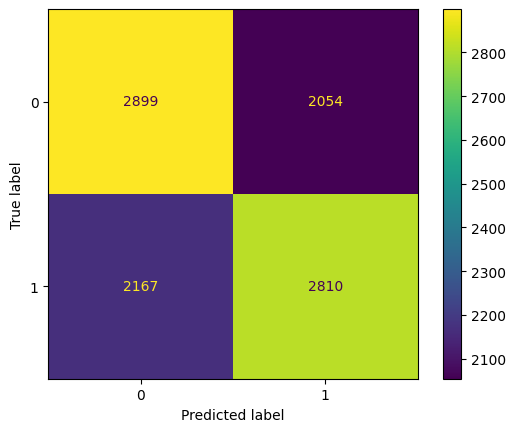

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Definisi fungsi confusionmatrix duluan
def confusionmatrix(predictions, y_testU2):
    cm = confusion_matrix(y_testU2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training
lr = LogisticRegression()
lr.fit(x_trainU2, y_trainU2.ravel())
predictions = lr.predict(x_testU2)

# Print classification report
print(classification_report(y_testU2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testU2)
plt.show()

In [63]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

np.float64(0.5749494920729845)

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testU2, predictions)

np.float64(0.5749494920729845)

              precision    recall  f1-score   support

           0       0.58      0.59      0.58     19872
           1       0.58      0.57      0.57     19848

    accuracy                           0.58     39720
   macro avg       0.58      0.58      0.58     39720
weighted avg       0.58      0.58      0.58     39720



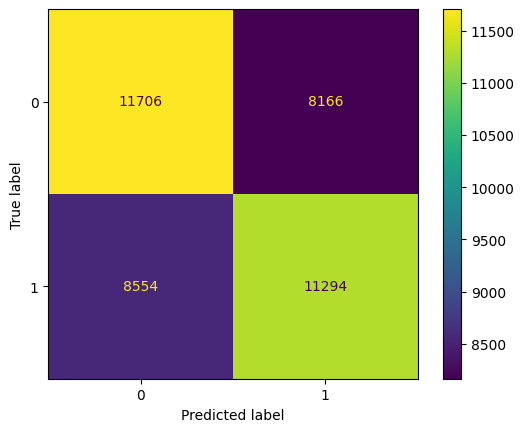

In [65]:
predictions = lr.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

## Decision Tree [Oversampling 80%:20%]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56536
           1       1.00      1.00      1.00     56539

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



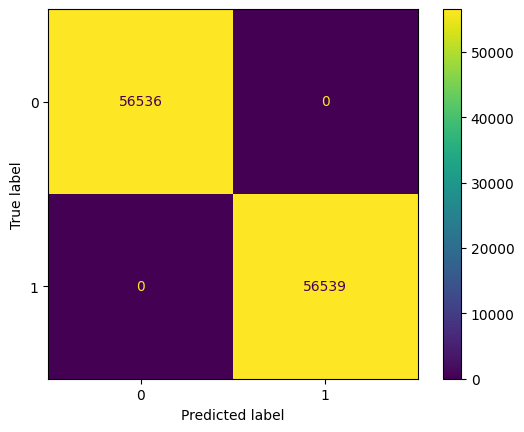

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Definisi fungsi confusionmatrix
def confusionmatrix(predictions, y_testO2):
    cm = confusion_matrix(y_testO2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training - Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_trainO2, y_trainO2.ravel())
predictions = dt.predict(x_testO2)

# Print classification report
print(classification_report(y_testO2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testO2)
plt.show()


In [67]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

np.float64(1.0)

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testO2, predictions)

np.float64(1.0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226150
           1       1.00      1.00      1.00    226147

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



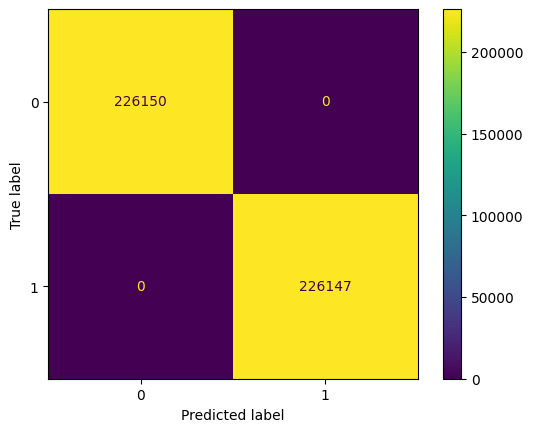

In [74]:
predictions = dt.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

## Decision Tree [Undersampling 80%:20%]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4953
           1       1.00      1.00      1.00      4977

    accuracy                           1.00      9930
   macro avg       1.00      1.00      1.00      9930
weighted avg       1.00      1.00      1.00      9930



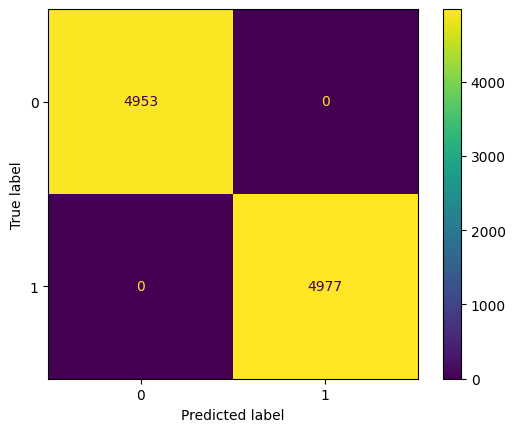

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Definisi fungsi confusionmatrix duluan
def confusionmatrix(predictions, y_testU2):
    cm = confusion_matrix(y_testU2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_trainU2, y_trainU2.ravel())
predictions = dt.predict(x_testU2)

# Print classification report
print(classification_report(y_testU2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testU2)
plt.show()

In [71]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

np.float64(1.0)

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testU2, predictions)

np.float64(1.0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19872
           1       1.00      1.00      1.00     19848

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720



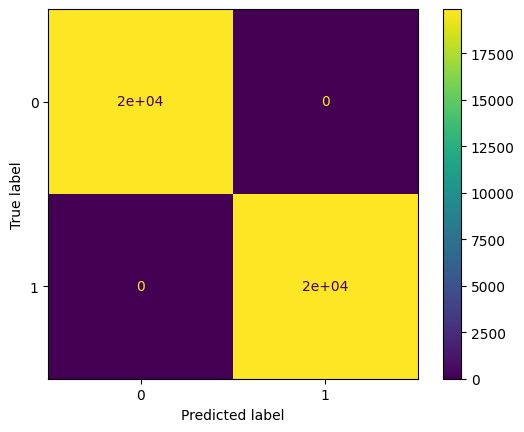

In [75]:
predictions = dt.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

## Random Forest [Oversampling 80%:20%]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56536
           1       1.00      1.00      1.00     56539

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



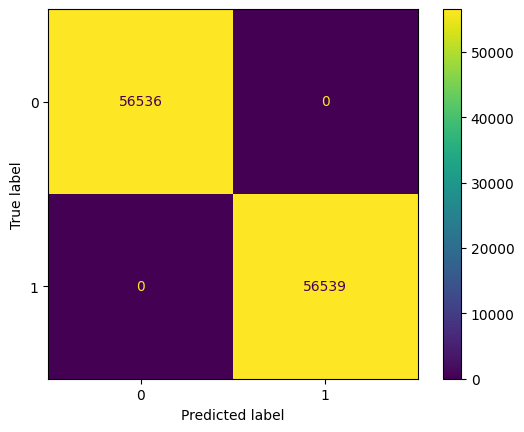

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Definisi fungsi confusionmatrix duluan
def confusionmatrix(predictions, y_testO2):
    cm = confusion_matrix(y_testO2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training - Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_trainO2, y_trainO2.ravel())
predictions = rf.predict(x_testO2)

# Print classification report
print(classification_report(y_testO2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testO2)
plt.show()

In [77]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

np.float64(1.0)

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testO2, predictions)

np.float64(1.0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226150
           1       1.00      1.00      1.00    226147

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



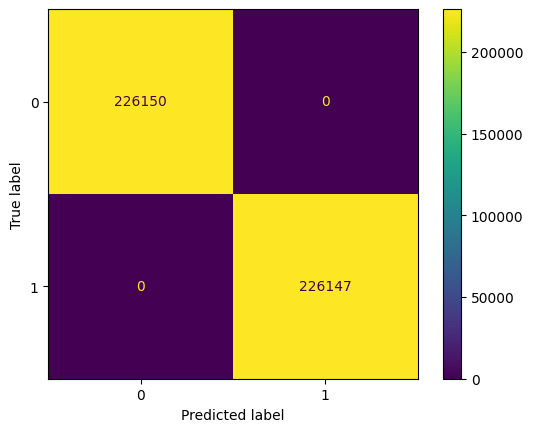

In [79]:
predictions = rf.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

In [89]:
rf_model = RandomForestClassifier().fit(x_trainO2,y_trainO2)
print(rf_model)

RandomForestClassifier()


## Random Forest [Undersampling 80%:20%]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4953
           1       1.00      1.00      1.00      4977

    accuracy                           1.00      9930
   macro avg       1.00      1.00      1.00      9930
weighted avg       1.00      1.00      1.00      9930



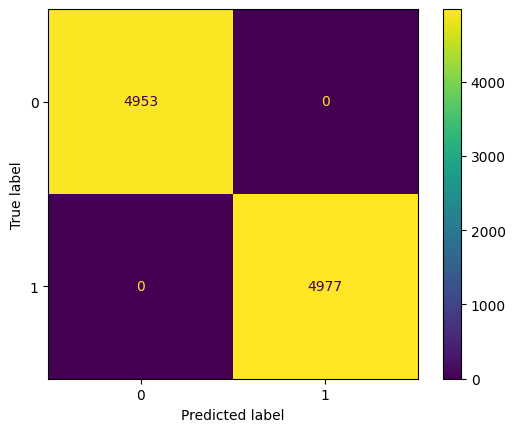

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Definisi fungsi confusionmatrix duluan
def confusionmatrix(predictions, y_testU2):
    cm = confusion_matrix(y_testU2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training - Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_trainU2, y_trainU2.ravel())
predictions = rf.predict(x_testU2)

# Print classification report
print(classification_report(y_testU2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testU2)
plt.show()


In [81]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

np.float64(1.0)

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testU2, predictions)

np.float64(1.0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19872
           1       1.00      1.00      1.00     19848

    accuracy                           1.00     39720
   macro avg       1.00      1.00      1.00     39720
weighted avg       1.00      1.00      1.00     39720



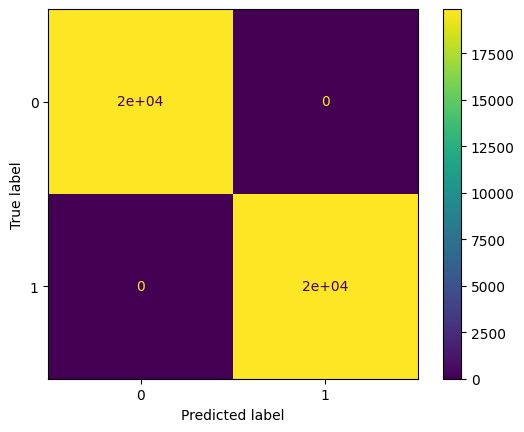

In [83]:
predictions = rf.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

In [86]:
rf_model = RandomForestClassifier().fit(x_trainU2,y_trainU2)
print(rf_model)

RandomForestClassifier()


In [87]:
acc_rf_train=round(rf_model.score(x_trainU2,y_trainU2)*100,2)
acc_rf_test=round(rf_model.score(x_testU2,y_testU2)*100,2)
error_rf = round(acc_rf_test - acc_rf_train,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Testing Accuracy: {} %".format(acc_rf_test))
print("Error: {} %".format(abs(error_rf)))

Training Accuracy: 100.0 %
Testing Accuracy: 100.0 %
Error: 0.0 %


In [90]:
y_test_pred_rf = rf_model.predict(x_testU2)

In [93]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_testU2, y_test_pred_rf ),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 1.0



## K-Nearest Neighbor [Oversampling 80%:20%]

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56536
           1       0.76      0.97      0.85     56539

    accuracy                           0.83    113075
   macro avg       0.86      0.83      0.83    113075
weighted avg       0.86      0.83      0.83    113075



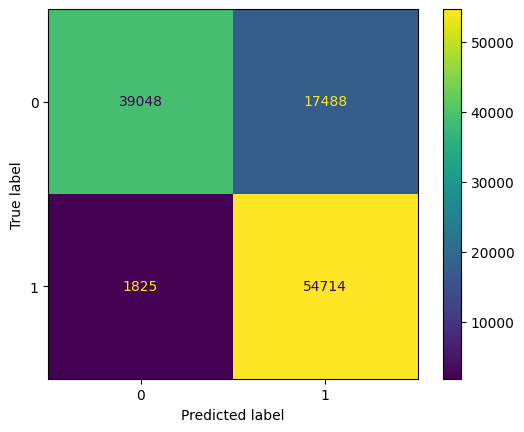

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Definisi fungsi confusionmatrix
def confusionmatrix(predictions, y_testO2):
    cm = confusion_matrix(y_testO2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training - K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ganti nilai k di sini
knn.fit(x_trainO2, y_trainO2.ravel())
predictions = knn.predict(x_testO2)

# Print classification report
print(classification_report(y_testO2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testO2)
plt.show()


In [97]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testO2, predictions)
bal_acc

np.float64(0.8291981820062655)

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testO2, predictions)

np.float64(0.8291981820062655)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87    226150
           1       0.81      0.98      0.89    226147

    accuracy                           0.88    452297
   macro avg       0.90      0.88      0.88    452297
weighted avg       0.90      0.88      0.88    452297



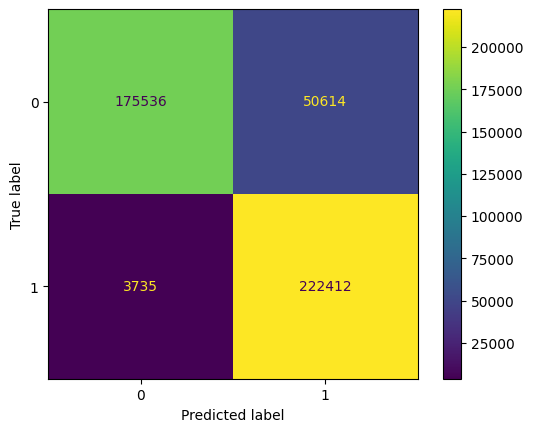

In [99]:
predictions = knn.predict(x_trainO2)

# print classification report
print(classification_report(y_trainO2, predictions))
confusionmatrix(predictions, y_trainO2)

K-Nearest Neighbor [Undersampling 80%:20%]

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4953
           1       0.89      0.90      0.90      4977

    accuracy                           0.89      9930
   macro avg       0.89      0.89      0.89      9930
weighted avg       0.89      0.89      0.89      9930



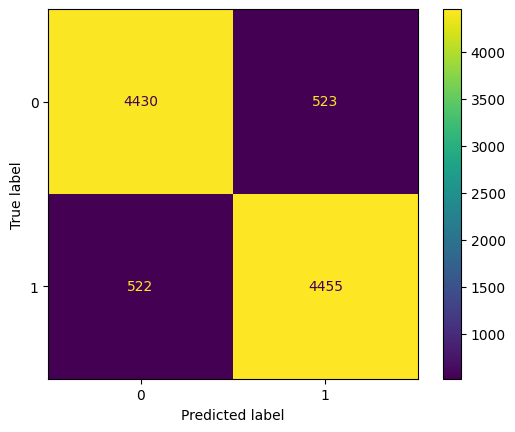

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur (sangat penting untuk KNN)
scaler = StandardScaler()
x_trainU2_scaled = scaler.fit_transform(x_trainU2)
x_testU2_scaled = scaler.transform(x_testU2)

# Definisi fungsi confusionmatrix
def confusionmatrix(predictions, y_testU2):
    cm = confusion_matrix(y_testU2, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

# Model training - K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(x_trainU2_scaled, y_trainU2.ravel())
predictions = knn.predict(x_testU2_scaled)

# Print classification report
print(classification_report(y_testU2, predictions))

# Tampilkan confusion matrix
confusionmatrix(predictions, y_testU2)
plt.show()


In [101]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_testU2, predictions)
bal_acc

np.float64(0.8947624852638308)

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_testU2, predictions)

np.float64(0.8947624852638308)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.49      0.50      0.49     19872
           1       0.49      0.48      0.48     19848

    accuracy                           0.49     39720
   macro avg       0.49      0.49      0.49     39720
weighted avg       0.49      0.49      0.49     39720



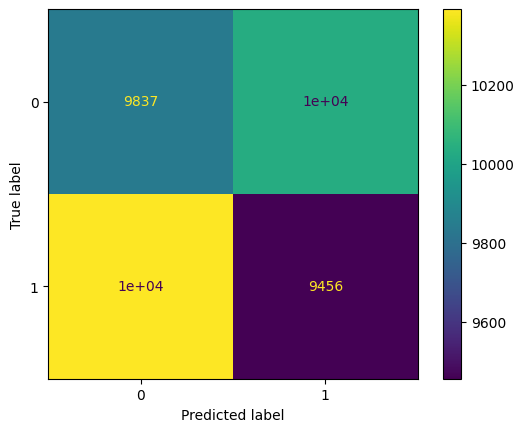

In [103]:
predictions = knn.predict(x_trainU2)

# print classification report
print(classification_report(y_trainU2, predictions))
confusionmatrix(predictions, y_trainU2)

# Prediction

In [104]:
application_test = df
print('This dataset has %d rows dan %d columns.\n' % application_test.shape)
application_test.head()

This dataset has 307511 rows dan 83 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age,Age_Category,TARGET_DESC
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1,25,2,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,45,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,52,1,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0,52,1,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1,54,1,0


In [105]:
application_test1 = application_test.copy()

## Checking NA

In [106]:
print('Missing values status:', application_test.isnull().values.any())
Test_NA = pd.DataFrame(application_test.isnull().sum(), columns=['Total Null Values'])
Test_NA['Percentage'] = (Test_NA['Total Null Values']/application_test.shape[0])*100
Test_NA.sort_values(by=['Percentage'], ascending=False).reset_index().head(20)

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
5,FLAG_OWN_REALTY,0,0.0
6,CNT_CHILDREN,0,0.0
7,AMT_INCOME_TOTAL,0,0.0
8,AMT_CREDIT,0,0.0
9,AMT_ANNUITY,0,0.0


In [108]:
application_test = application_test.drop([
    'COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
    'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
    'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
    'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE'
], axis=1, errors='ignore')

In [109]:
print('Missing values status:', application_test.isnull().values.any())
Test_NA = pd.DataFrame(application_test.isnull().sum(), columns=['Total Null Values'])
Test_NA['Percentage'] = (Test_NA['Total Null Values']/application_test.shape[0])*100
Test_NA.sort_values(by=['Percentage'], ascending=False).reset_index().head(20)

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
5,FLAG_OWN_REALTY,0,0.0
6,CNT_CHILDREN,0,0.0
7,AMT_INCOME_TOTAL,0,0.0
8,AMT_CREDIT,0,0.0
9,AMT_ANNUITY,0,0.0


# Label Encoding

In [110]:
cat_var_new = application_test.select_dtypes(include = ['object']).columns.tolist()
application_test[cat_var_new] = application_test[cat_var_new].apply(LabelEncoder().fit_transform)

In [114]:
# Daftar kolom yang ingin dipilih
selected_columns = [
    'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
    'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
    'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
    'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
    'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY'
]

# Pilih hanya kolom yang tersedia
existing_columns = [col for col in selected_columns if col in application_test.columns]

# Ambil hanya kolom yang tersedia
application_test = application_test[existing_columns]

# Tampilkan 5 baris pertama
application_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,-637,351000.0,406597.5,202500.0,-3648.0,-1134.0,-2120,24700.5,5,7,0,1,0.262949,0,4,2.0,0.139376,2.0,0
1,-1188,1129500.0,1293502.5,270000.0,-1186.0,-828.0,-291,35698.5,39,4,0,0,0.622246,0,1,0.0,0.535276,0.0,0
2,-225,135000.0,135000.0,67500.0,-4260.0,-815.0,-2531,6750.0,11,7,0,1,0.555912,0,4,0.0,0.729567,0.0,0
3,-3039,297000.0,312682.5,135000.0,-9833.0,-617.0,-2437,29686.5,5,7,0,0,0.650442,0,4,0.0,0.535276,0.0,0
4,-3038,513000.0,513000.0,121500.0,-4311.0,-1106.0,-3458,21865.5,37,7,1,1,0.322738,0,4,0.0,0.535276,0.0,1


In [123]:
# Pastikan kolom TARGET tidak masuk ke dalam fitur prediksi
X_test = df.drop('TARGET', axis=1, errors='ignore')  # errors='ignore' aman walaupun kolom tidak ada

# Prediksi
predict = pd.Series(rf.predict(X_test), name="TARGET").astype(int)

# Gabungkan hasil prediksi dengan ID
results = pd.concat([application_test1['SK_ID_CURR'].reset_index(drop=True), predict], axis=1)

# Simpan ke CSV
results.to_csv("predict application.csv", index=False)
results.head(10)


,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
5,100008,0
6,100009,0
7,100010,0
8,100011,0
9,100012,0


There are total 307511 records in our data.
Is Fraud:
Count: 24825
Proportion (Fraud): 8.0%
Not Fraud:
Count: 282686
Proportion (Not Fraud): 91.9%


'8.0'

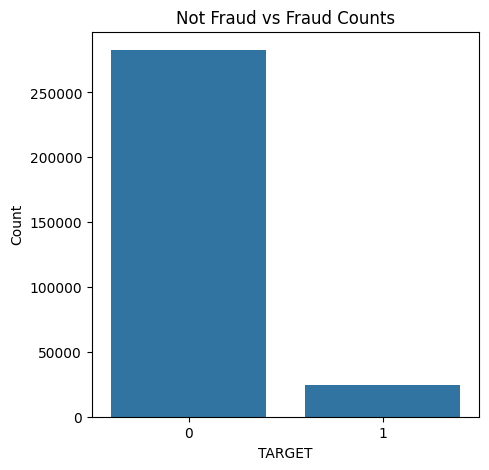

In [124]:
#check the fraud proportion of the data
target_info(results['TARGET'])